<a href="https://colab.research.google.com/github/Radioactive009/Machine-Learning/blob/main/Titanic_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
file_path = "titanic_dataset.csv"  # Change this to your actual file path
df = pd.read_csv("/titanic_dataset.csv")

# Display basic info
print(df.info())

# Show first few rows
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

In [3]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with the most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

print(df.isnull().sum())  # Check again


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-4-4098c20a902d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-4-4098c20a902d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

<ipython-input-5-8587a93484ca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Survived", palette="viridis")


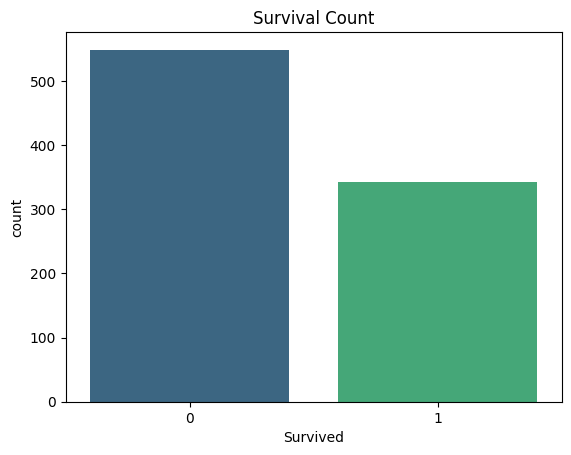

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Survival Countplot
sns.countplot(data=df, x="Survived", palette="viridis")
plt.title("Survival Count")
plt.show()


From this visualization we can clearly see that more than 500 people have died and nearly 350 people have survived.

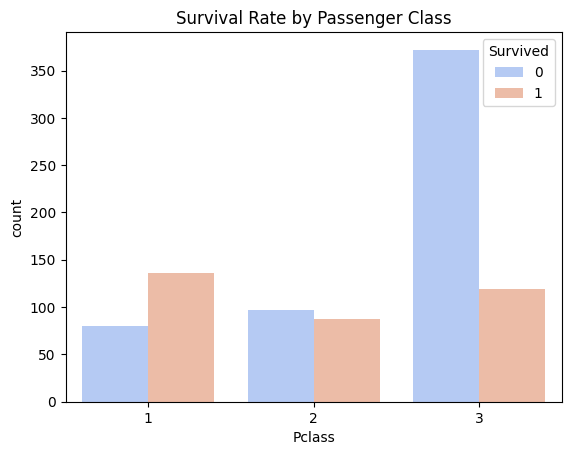

In [6]:
sns.countplot(data=df, x="Pclass", hue="Survived", palette="coolwarm")
plt.title("Survival Rate by Passenger Class")
plt.show()


First class passengers have higher survival rate and third class passengers have least survival rate.

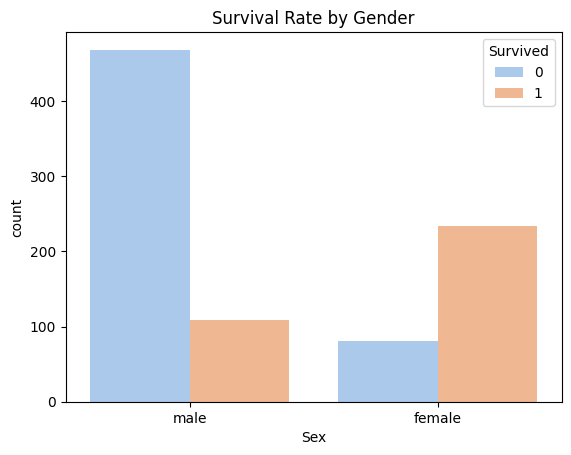

In [7]:
sns.countplot(data=df, x="Sex", hue="Survived", palette="pastel")
plt.title("Survival Rate by Gender")
plt.show()


Women has higher survival rate than men.

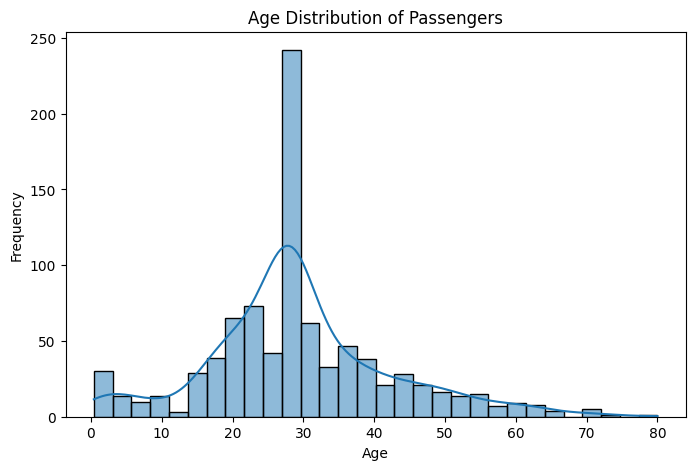

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'],bins = 30, kde = True)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution of Passengers")
plt.show()


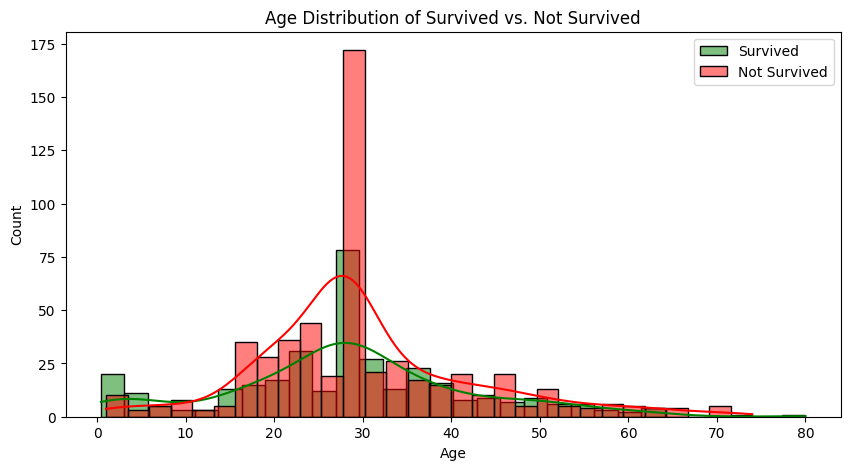

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df[df["Survived"] == 1]["Age"], bins=30, kde=True, label="Survived", color="green")
sns.histplot(df[df["Survived"] == 0]["Age"], bins=30, kde=True, label="Not Survived", color="red")
plt.legend()
plt.title("Age Distribution of Survived vs. Not Survived")
plt.show()


0-10 age group children have higher survival rate.

<ipython-input-14-cb10a53dae3c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Fare", data=df, palette="muted")


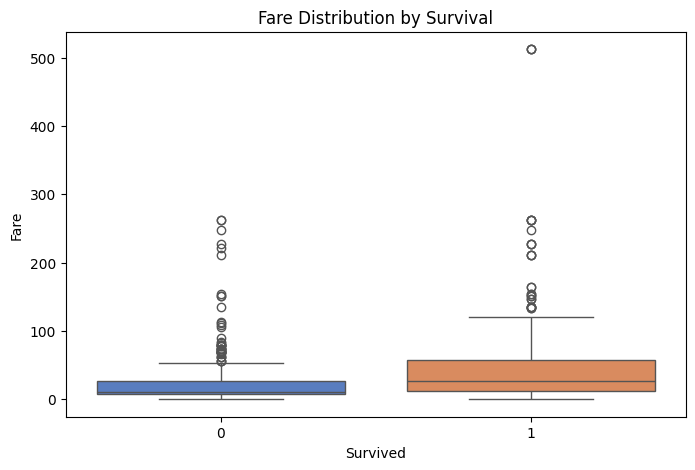

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Survived", y="Fare", data=df, palette="muted")
plt.title("Fare Distribution by Survival")
plt.show()


<ipython-input-15-9798629934a4>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Embarked", y="Survived", data=df, ci=None, palette="Set2")
<ipython-input-15-9798629934a4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Embarked", y="Survived", data=df, ci=None, palette="Set2")


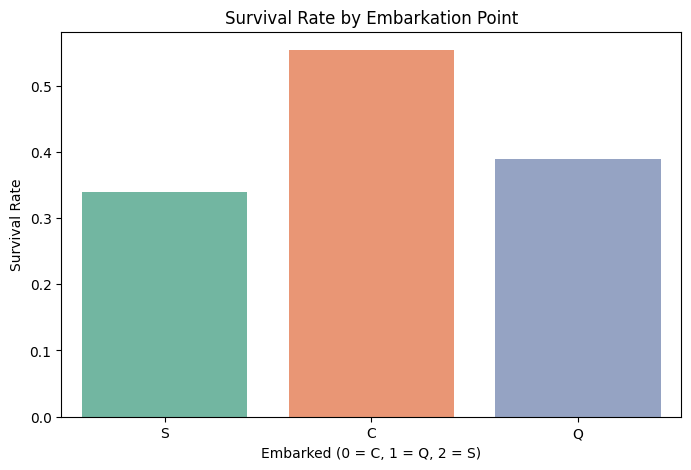

In [15]:
plt.figure(figsize=(8,5))
sns.barplot(x="Embarked", y="Survived", data=df, ci=None, palette="Set2")
plt.title("Survival Rate by Embarkation Point")
plt.xlabel("Embarked (0 = C, 1 = Q, 2 = S)")
plt.ylabel("Survival Rate")
plt.show()


People who have emparked from C have higher survival rate and Southmpton have least survival rate.

<ipython-input-16-e59e79449fcd>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="FamilySize", y="Survived", data=df, ci=None, palette="coolwarm")
<ipython-input-16-e59e79449fcd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="FamilySize", y="Survived", data=df, ci=None, palette="coolwarm")


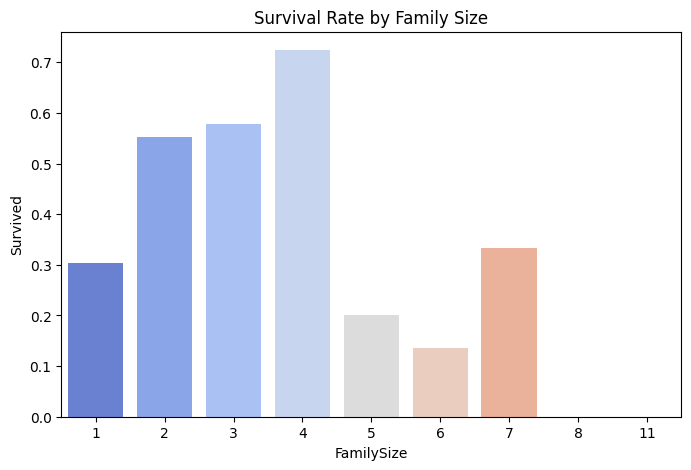

In [16]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

plt.figure(figsize=(8,5))
sns.barplot(x="FamilySize", y="Survived", data=df, ci=None, palette="coolwarm")
plt.title("Survival Rate by Family Size")
plt.show()


<ipython-input-17-6d9e0d26e3db>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="AgeGroup", y="Survived", data=df, ci=None, palette="pastel")
<ipython-input-17-6d9e0d26e3db>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AgeGroup", y="Survived", data=df, ci=None, palette="pastel")


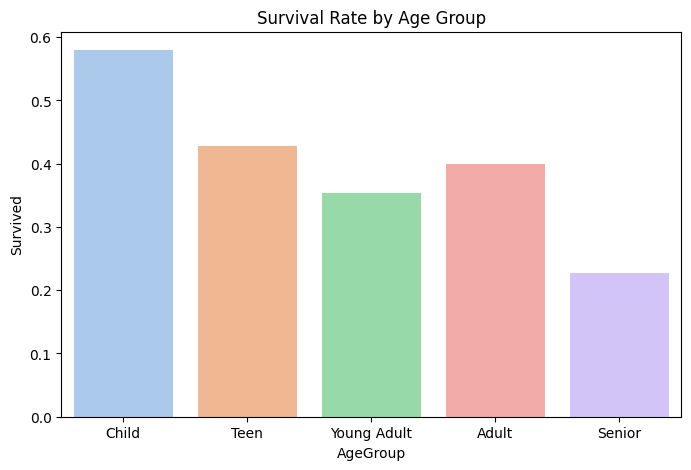

In [17]:
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 12, 18, 35, 60, 100], labels=["Child", "Teen", "Young Adult", "Adult", "Senior"])

plt.figure(figsize=(8,5))
sns.barplot(x="AgeGroup", y="Survived", data=df, ci=None, palette="pastel")
plt.title("Survival Rate by Age Group")
plt.show()
